In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addVertex(a,b):
    gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2) )


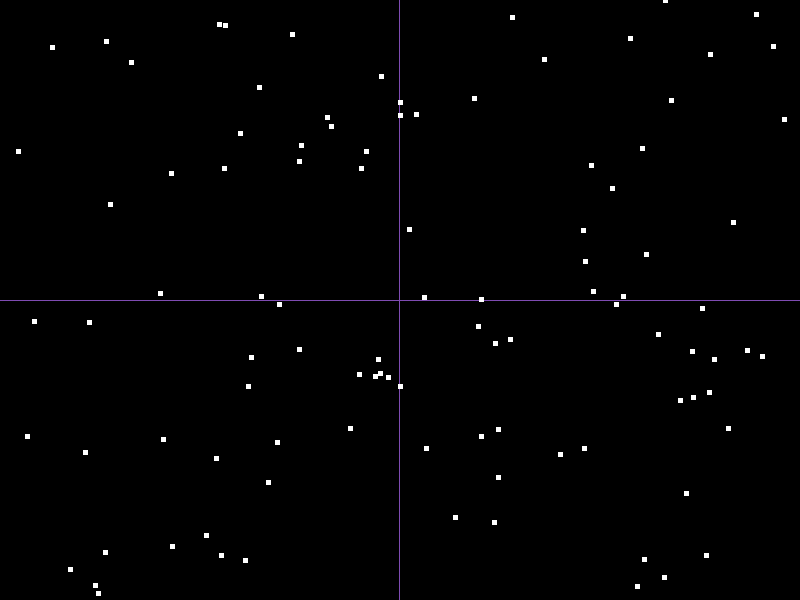

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(.5,.3,.7)
gl.glPointSize(2)

gl.glBegin(gl.GL_LINES)
gl.glVertex2f(0,-1)
gl.glVertex2f(0,1)
gl.glVertex2f(1,0)
gl.glVertex2f(-1,0)
gl.glEnd()


gl.glColor3f(100,100,100)

import random

gl.glPointSize(5)

gl.glBegin(gl.GL_POINTS)



for i in range(100):

  X = random.uniform(-1, +1)  

  Y = random.uniform(-1, +1)

  gl.glVertex2f(X, Y)


gl.glEnd()


img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)

img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]

show.image(img/255.0)




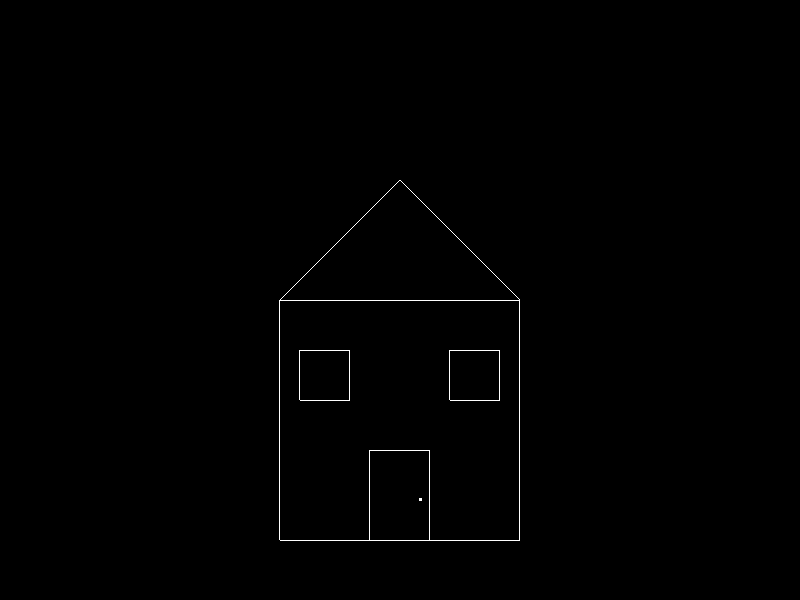

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


gl.glBegin(gl.GL_LINES)

#Roof

addVertex(-120, 0)

addVertex(0, 120)

addVertex(0, 120)

addVertex(120, 0)

# Box

addVertex(-120, 0)

addVertex(-120, -240)

addVertex(120, 0)

addVertex(120, -240)

addVertex(120, -240)

addVertex(-120, -240)

addVertex(-120, 0)

addVertex(120, 0)

#1st Window

addVertex(-100, -50)

addVertex(-100, -100)

addVertex(-50, -50)

addVertex(-50, -100)

addVertex(-100, -50)

addVertex(-50, -50)

addVertex(-100, -100)

addVertex(-50, -100)

#2nd Window

addVertex(100, -50)

addVertex(100, -100)

addVertex(50, -50)

addVertex(50, -100)

addVertex(100, -50)

addVertex(50, -50)

addVertex(100, -100)

addVertex(50, -100)


#Door

addVertex(-30, -150)

addVertex(-30, -240)

addVertex(30, -150)

addVertex(30, -240)

addVertex(-30, -150)

addVertex(30, -150)

gl.glEnd()

#Lock

gl.glPointSize(3)

gl.glBegin(gl.GL_POINTS)



addVertex(20, -200)


gl.glEnd()

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)